In [86]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import  KMeans
import sklearn.metrics as metrics
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler



In [87]:
df=pd.read_csv('books.csv',on_bad_lines='skip')


<h1 style="color:blue">Data Exploration:</h1>
The dataset that contains information about the books, who wrote these books and other relevant information. Now that we know what our data looks like, let’s go ahead and find all the null values present in our data:

In [88]:
df.head(2)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.


In [89]:
df.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [90]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


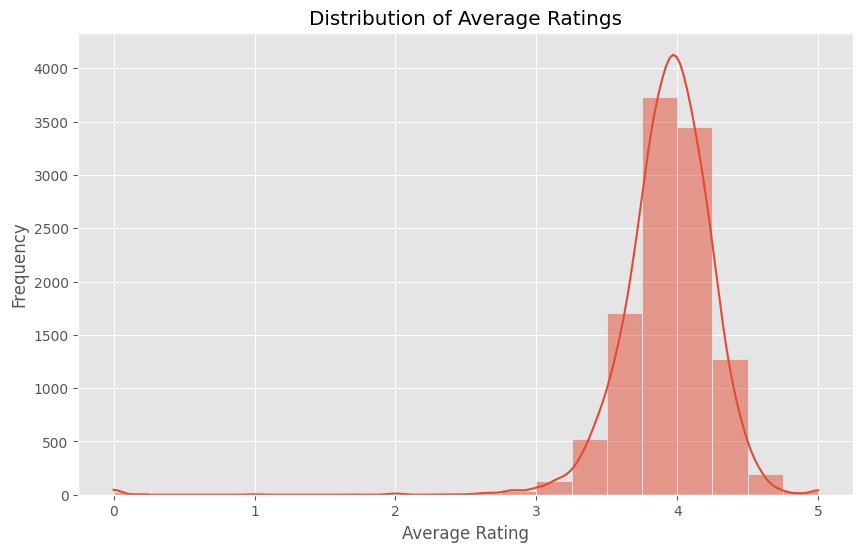

In [91]:
# Check the distribution of average ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['average_rating'], bins=20, kde=True)
df['average_rating'] = df['average_rating'].astype(float)
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

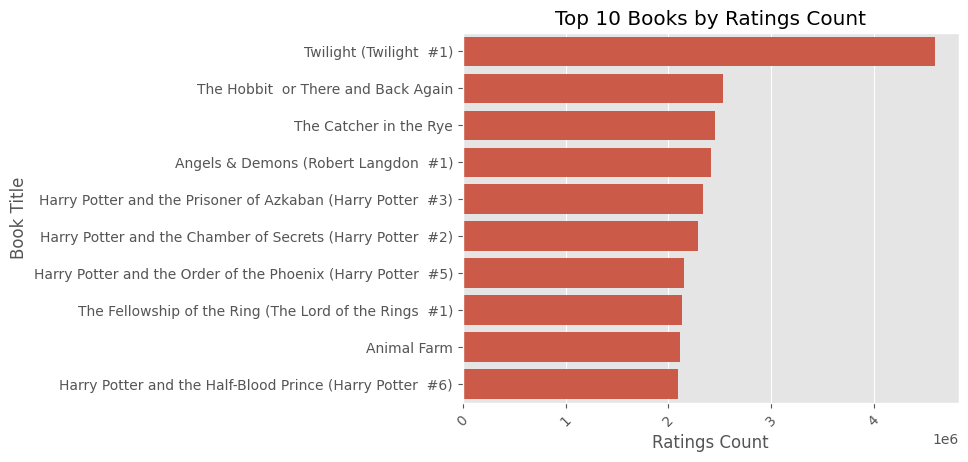

In [92]:
# top 10 books by ratings count
top_books = df.sort_values('ratings_count', ascending=False).head(10)
sns.barplot(data=top_books, y='title', x='ratings_count')
plt.title('Top 10 Books by Ratings Count')
plt.xlabel('Ratings Count')
plt.ylabel('Book Title')
plt.xticks(rotation=45)
plt.show()


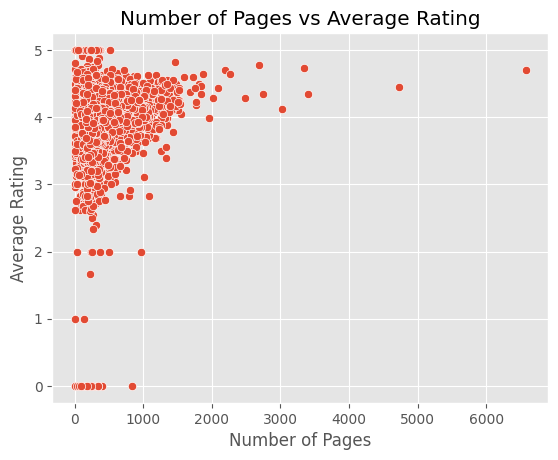

In [93]:
#relationship between number of pages and average rating
sns.scatterplot(data=df, x='  num_pages', y='average_rating')
plt.title('Number of Pages vs Average Rating')
plt.xlabel('Number of Pages')
plt.ylabel('Average Rating')
plt.show()

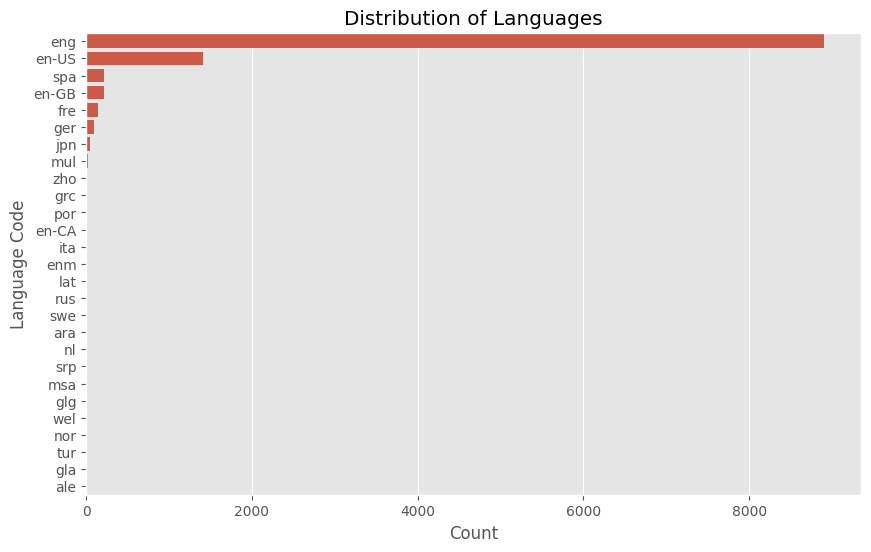

In [94]:
# Check the distribution of languages
plt.figure(figsize=(10, 6))
sns.countplot(y='language_code', data=df, order=df['language_code'].value_counts().index)
plt.title('Distribution of Languages')
plt.xlabel('Count') 
plt.ylabel('Language Code')
plt.show()


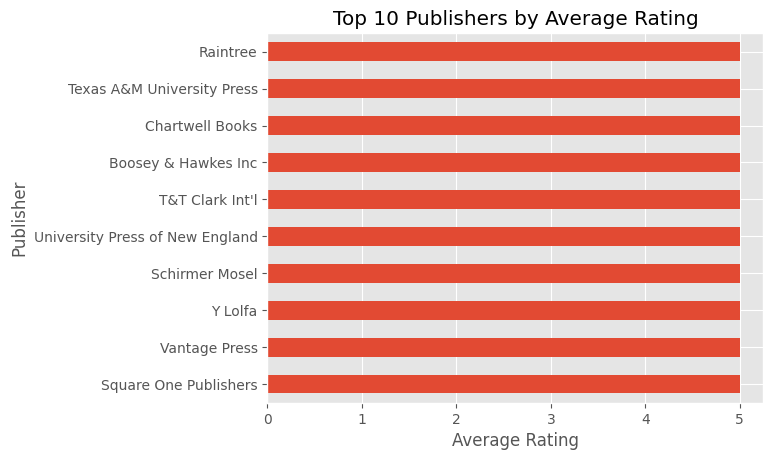

In [95]:
# top 10 publishers by average rating
top_publishers = df.groupby('publisher')['average_rating'].mean().sort_values(ascending=False).head(10)
top_publishers.plot(kind='barh')
plt.title('Top 10 Publishers by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Publisher')
plt.show()

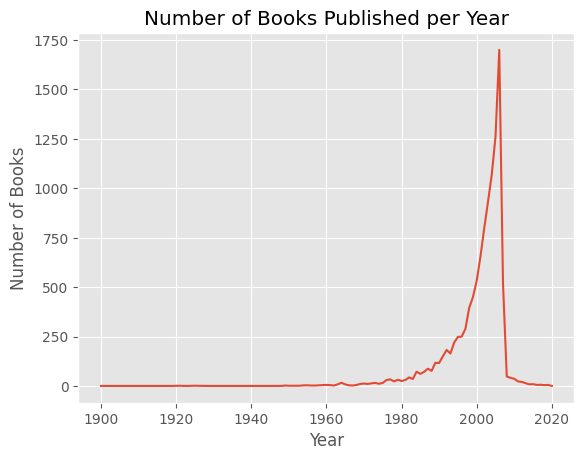

In [96]:
# books per year
df['year'] = pd.to_datetime(df['publication_date'], errors='coerce').dt.year
books_per_year = df.groupby('year').size()
books_per_year.plot(kind='line')
plt.title('Number of Books Published per Year')
plt.xlabel('Year')
plt.ylabel('Number of Books')
plt.show()


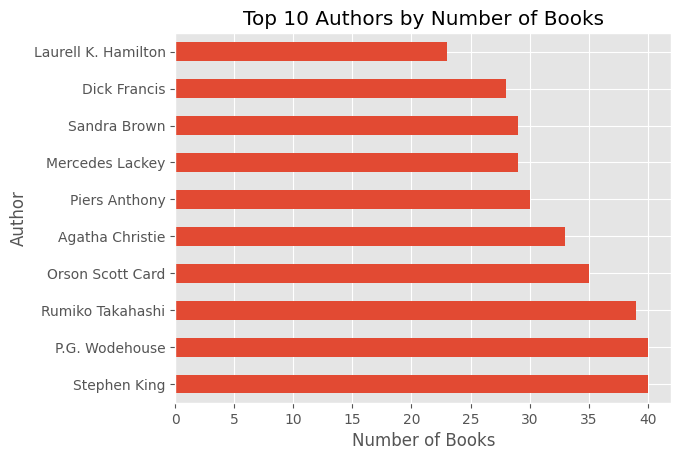

In [97]:
top_authors = df['authors'].value_counts().head(10)
top_authors.plot(kind='barh')
plt.title('Top 10 Authors by Number of Books')
plt.xlabel('Number of Books')
plt.ylabel('Author')
plt.show()

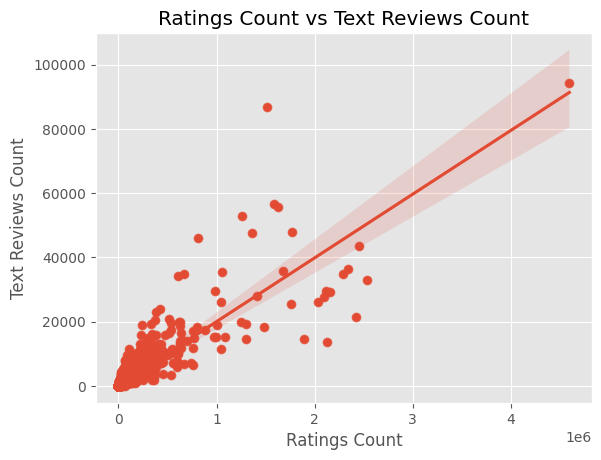

In [98]:
# Relationship between ratings count and text reviews count
sns.scatterplot(data=df, x='ratings_count', y='text_reviews_count')
sns.regplot(data=df, x='ratings_count', y='text_reviews_count')
plt.title('Ratings Count vs Text Reviews Count')
plt.xlabel('Ratings Count')
plt.ylabel('Text Reviews Count')
plt.show()

In [99]:
print(df.columns)


Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher', 'year'],
      dtype='object')


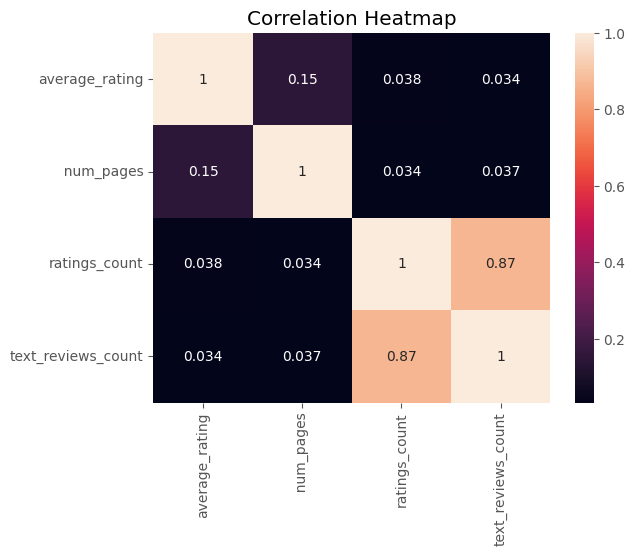

In [100]:
sns.heatmap(df[['average_rating', '  num_pages', 'ratings_count', 'text_reviews_count']].corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

From the results above, we can see that our scores are all between 0 and 5. We also get to know more about the other columns, such as the average of the mean scores and other information that might help us in the next steps. We also checked the data types of each column and also saw that there were no null values present in our data. Now let’s move further

C:\Users\rasha\AppData\Local\Temp\ipykernel_25136\324341867.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='average_rating',y='title',data=top_ten,palette='viridis')


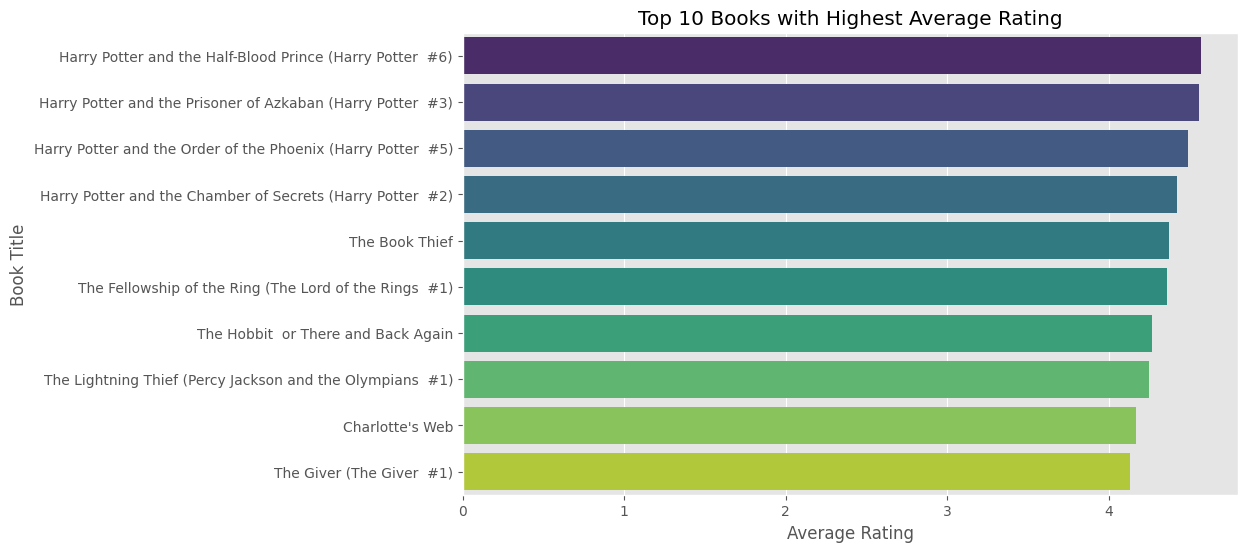

In [101]:
top_ten=df[df['ratings_count']>1000000].sort_values('average_rating',ascending=False).head(10)
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
sns.barplot(x='average_rating',y='title',data=top_ten,palette='viridis')
plt.title('Top 10 Books with Highest Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Book Title')
plt.show()

The results above show us the top 10 books in our data. We saw that the max score in our data was 5.0 but we don’t see any books in the above result with a score of 5.0. Indeed, we have filtered these books according to the number of notes. We’ve made sure that all of the books we have in the above results have a decent rating. There may be books in the data that may have only 1 or 2 notes may be rated 5.0. We want to avoid such books, which is why we used this type of filtering.

Let’s go ahead and take a look at some of the top authors in our data. We’ll rank them according to the number of books they’ve written as long as those books are present in the data:

C:\Users\rasha\AppData\Local\Temp\ipykernel_25136\2739872153.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=most_books['title'], y=most_books.index, palette='viridis')


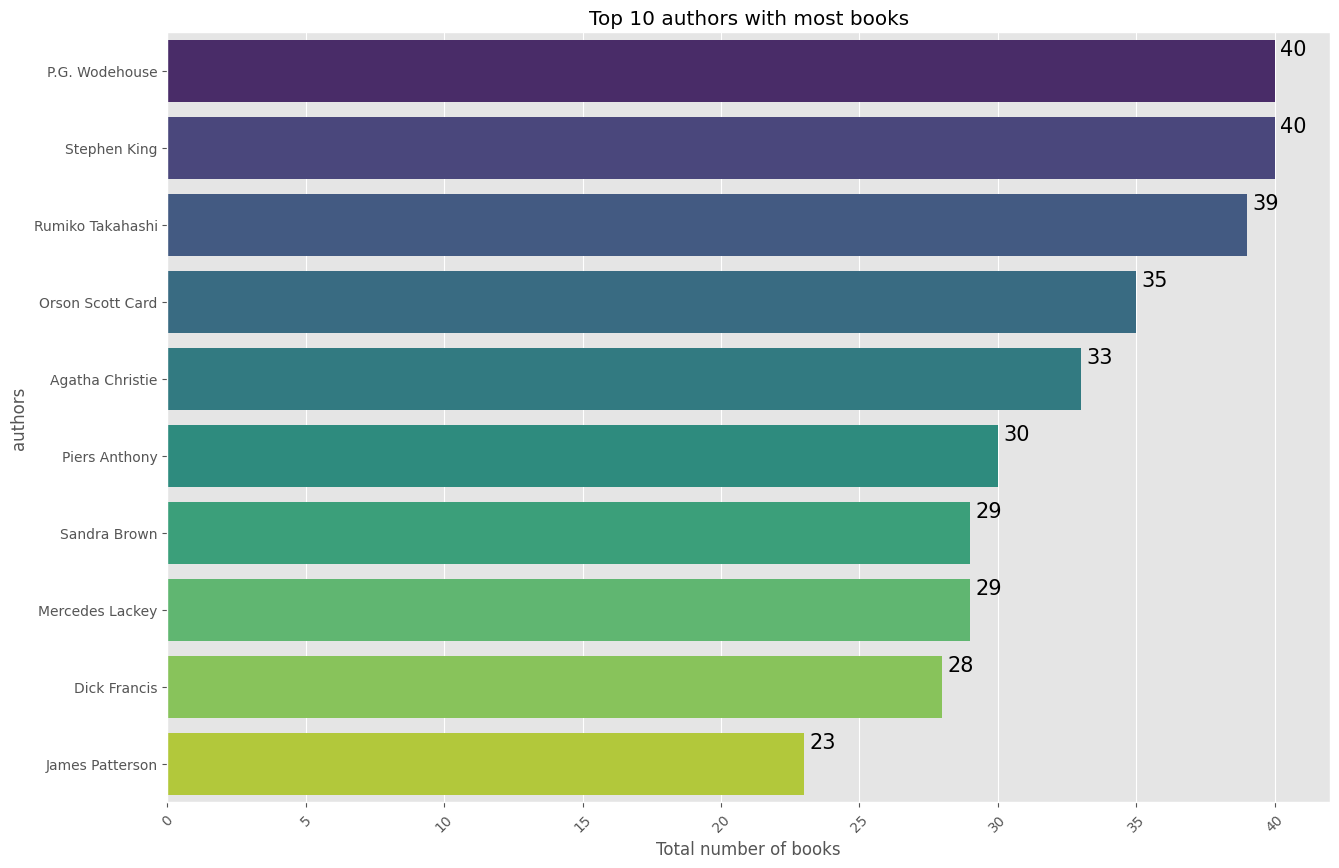

In [102]:
most_books = df.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(10).set_index('authors')
plt.figure(figsize=(15,10))
ax = sns.barplot(x=most_books['title'], y=most_books.index, palette='viridis')
plt.xticks(rotation=45)
ax.set_title("Top 10 authors with most books")
ax.set_xlabel("Total number of books")
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

From the above chart, Stephen King and P.G. Wodehouse have the most books in the data. Both authors have 40 books in our dataset followed by Rumiko Takahashi and Orson Scott Card.

Next, we’ll take a look at which books have been reviewed the most. We have the average rating column in our data and also the number of times a particular book has been rated. We will try to use this column to find the most commented books present in our data:

C:\Users\rasha\AppData\Local\Temp\ipykernel_25136\1061950661.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=most_rated['ratings_count'], y=most_rated.index, palette='viridis')


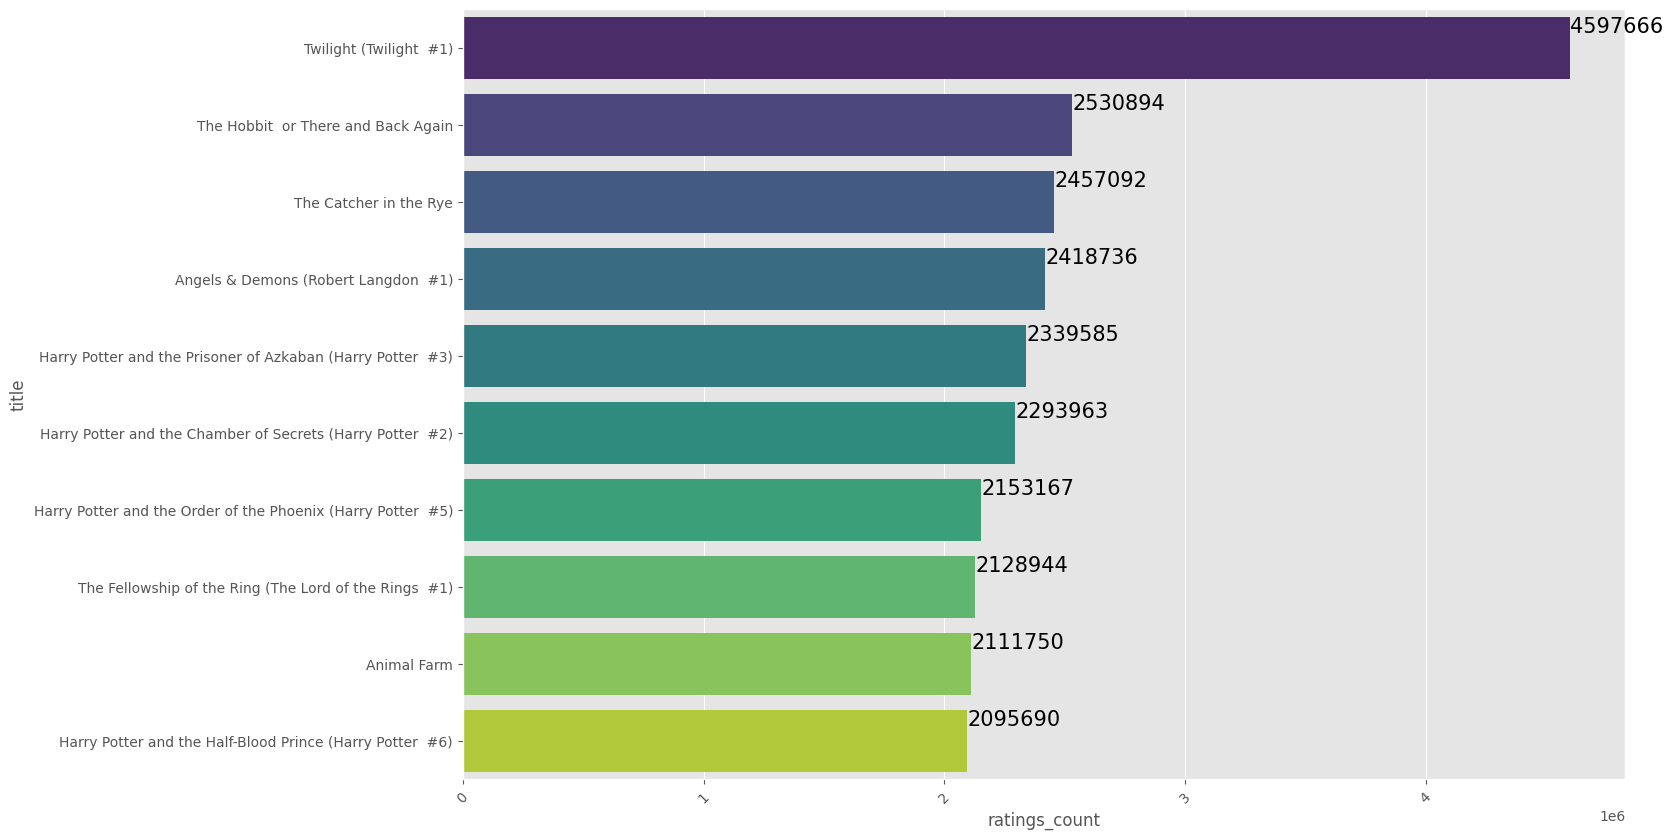

In [103]:
most_rated = df.sort_values('ratings_count', ascending = False).head(10).set_index('title')
plt.figure(figsize=(15,10))
ax = sns.barplot(x=most_rated['ratings_count'], y=most_rated.index, palette='viridis')
plt.xticks(rotation=45)
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

We can see that Twilight has been rated more times than any other book! Also, these ratings are all in the millions! So that means Twilight has been reviewed over 4 million times, followed by The Hobbit or There and Back Again and The Catcher in the Rye which has been reviewed over 2 million times.

Let’s try to find a relation between our average score and the number of scores. We are doing this to see how we can use these columns in our recommendation. We will also check the distribution of average scores with the number of pages in a book, the language used in the book and the number of text reviews:

C:\Users\rasha\AppData\Local\Temp\ipykernel_25136\2988746623.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['average_rating'],ax=ax)


Text(0.5, 0, 'Average rating')

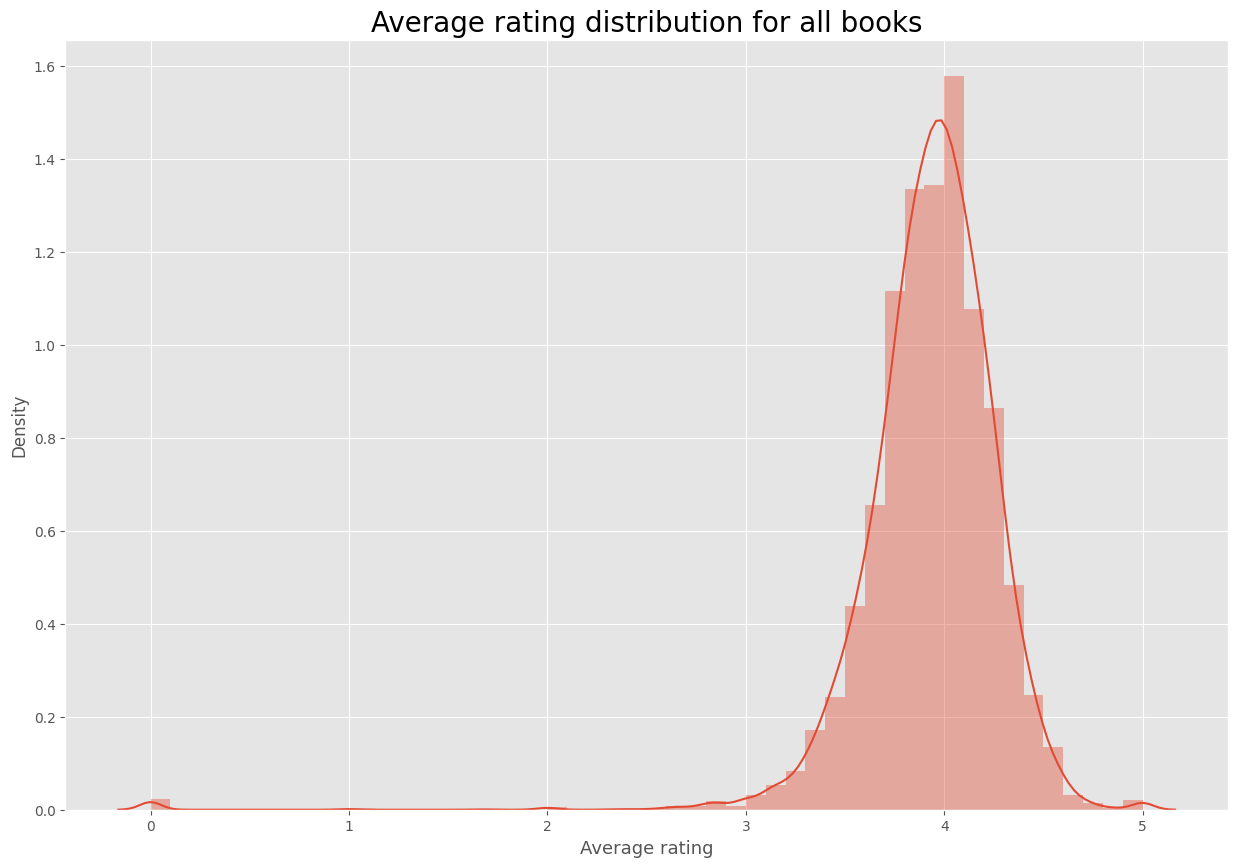

In [104]:
df.average_rating = df.average_rating.astype(float)
fig, ax = plt.subplots(figsize=[15,10])
sns.distplot(df['average_rating'],ax=ax)
ax.set_title('Average rating distribution for all books',fontsize=20)
ax.set_xlabel('Average rating',fontsize=13)

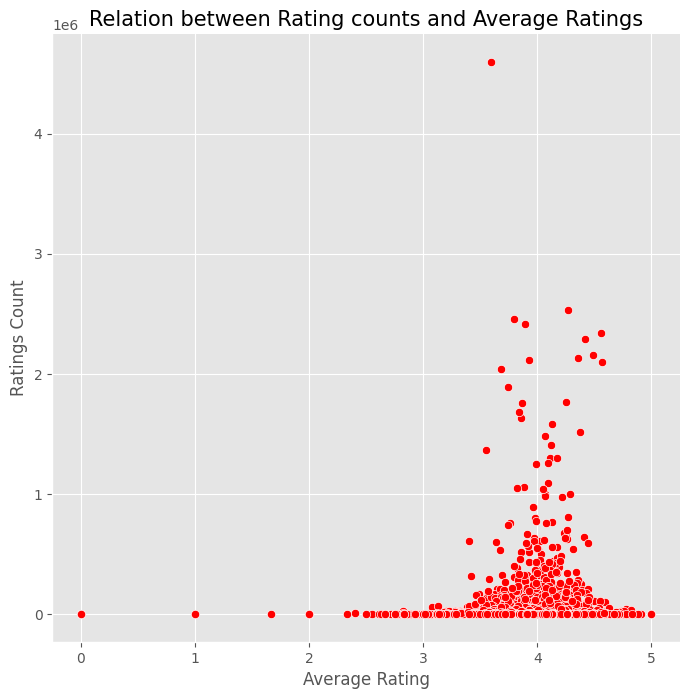

In [105]:
ax = sns.relplot(data=df, x="average_rating", y="ratings_count", color = 'red', sizes=(100, 200), height=7, marker='o')
plt.title("Relation between Rating counts and Average Ratings",fontsize = 15)
ax.set_axis_labels("Average Rating", "Ratings Count")

<Figure size 1500x1000 with 0 Axes>

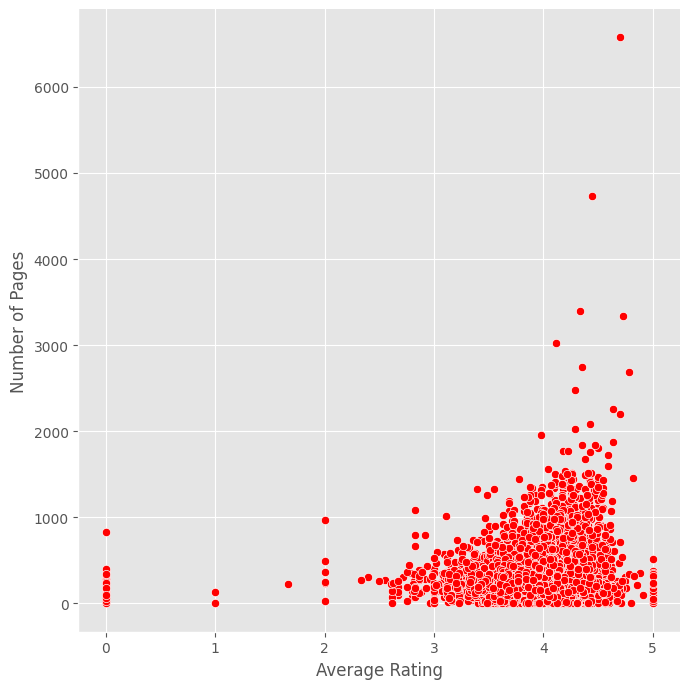

In [106]:
plt.figure(figsize=(15,10))
ax = sns.relplot(x="average_rating", y="  num_pages", data = df, color = 'red',sizes=(100, 200), height=7, marker='o')
ax.set_axis_labels("Average Rating", "Number of Pages")

After comparing the average rating with the different columns, we can continue to use the language and number of ratings for our recommendation system. Still, the other columns didn’t make much sense and using them might not help us to a great extent so we could omit them.

I will make a copy of our original data just to be safe so that we are safe in case we mess anything up:

In [107]:
df2 = df.copy()

<h1>Data Preparation:</h1>
We are now going to create a new column called ‘rating_between’. We will divide our average rating column into different categories such as rating between 0 and 1, 1 and 2, etc. This will work as one of the features that we will build into our model so that it can make better predictions:

In [108]:
df2.loc[ (df2['average_rating'] >= 0) & (df2['average_rating'] <= 1), 'rating_between'] = "between 0 and 1"
df2.loc[ (df2['average_rating'] > 1) & (df2['average_rating'] <= 2), 'rating_between'] = "between 1 and 2"
df2.loc[ (df2['average_rating'] > 2) & (df2['average_rating'] <= 3), 'rating_between'] = "between 2 and 3"
df2.loc[ (df2['average_rating'] > 3) & (df2['average_rating'] <= 4), 'rating_between'] = "between 3 and 4"
df2.loc[ (df2['average_rating'] > 4) & (df2['average_rating'] <= 5), 'rating_between'] = "between 4 and 5"

We are now going to create two new DataFrames containing the different values of the rating_between column that we have just created. We will assign a value of 1 if one grade falls under a particular group, say 4 and 5, and the others will be assigned a value of 0.

We will apply the same approach to split the language code column to retrieve these languages individually and give them the value of 1 and 0 also where 1 will be assigned if the book is written in a particular language eg English and 0 if it is not written in English:

In [109]:
rating_df = pd.get_dummies(df2['rating_between'])
language_df = pd.get_dummies(df2['language_code'])

We are now going to concatenate these two data frames into one and name it as features. This DataFrame will be the functionality that we provide to the Book Recommendation System with Machine Learning. It will contain the values of rating_df and language_df and will also have the values of average grade and number of grades:

In [110]:
features = pd.concat([rating_df, 
                      language_df, 
                      df2['average_rating'], 
                      df2['ratings_count']], axis=1)

<h2>Book Recommendation System: Final Step</h2>
Now that our features are ready, we will now use the Min-Max scaler to reduce these values. This will help reduce the bias for some of the books that have too many features. The algorithm will find the median for all and equalize it:

In [111]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
features = min_max_scaler.fit_transform(features)

We have reduced the features and we now can use the KNN algorithm to build our Book Recommendation system with Machine Learning using Python:

In [112]:
model=neighbors.NearestNeighbors(n_neighbors=5, algorithm='ball_tree')
model.fit(features)
dist ,idlist=model.kneighbors(features)

We have built a machine learning model for recommending books and now we will need to create a function using Python. When this function is called, we will have to pass the name of the book to it. The model will try to find books based on the features. We’ll store those book names that the system recommends in a list and return them at the end:

In [114]:
# ✅ دالة الاقتراحات بشكل احترافي
def recommend_books(book_name):
    matches = df[df['title'].str.lower() == book_name.lower()]
    
    if matches.empty:
        print(f"❌ Sorry, the book '{book_name}' was not found in our database.")
        print("👉 Please check the name or try another book.")
        return
    
    book_id = matches.index[0]
    distances, indices = model.kneighbors([features[book_id]])

    print(f"✅ Recommendations for \"{book_name}\":\n")
    for i in range(1, len(distances.flatten())):
        suggested_title = df.iloc[indices.flatten()[i]]['title']
        print(f"{i}: {suggested_title} (Similarity Score: {distances.flatten()[i]:.2f})")

# ✅ تجربة
recommend_books("Harry Potter and the Half-Blood Prince ")



❌ Sorry, the book 'Harry Potter and the Half-Blood Prince ' was not found in our database.
👉 Please check the name or try another book.
